In [147]:
import pymssql
from math import *
import pandas as pd
import numpy as np 
from haversine import haversine
from datetime import datetime
import time

# DB 서버 주소
server = '203.234.62.143'
# 데이터 베이스 이름
database = 'DSEM-Traj2019'
# 접속 유저명
username = 'sojin'
# 접속 유저 패스워드
password = '1234'

conn = pymssql.connect(server , username, password, database)
curs = conn.cursor()

#curs.execute()

# sql = 'SELECT TOP (1000) *  FROM lifelog_manual'
sql = "SELECT TOP (1000) *  FROM lifelog_manual where userid='GAH0001' order by time asc"
df = pd.read_sql(sql, con = conn)

conn.close()

In [148]:
df

,id,userid,time,set_id,set_seq,x,y,z,HR,lat,lon,alt,acttype,actaccu
0,2719446,GAH0001,2019-01-02 17:42:23,GAH0001-2019-01-02-0000001,1,-1.967710,1.879528,4.615663,0,35.945543,126.682831,45.874243,unknown,unknown
1,2719447,GAH0001,2019-01-02 17:42:28,GAH0001-2019-01-02-0000001,2,-0.949285,-0.210544,-2.742737,0,35.945484,126.682721,39.698714,unknown,unknown
2,2719448,GAH0001,2019-01-02 17:42:33,GAH0001-2019-01-02-0000001,3,1.391841,-0.627860,-4.050726,0,35.945512,126.682683,42.765453,unknown,unknown
3,2719449,GAH0001,2019-01-02 17:42:38,GAH0001-2019-01-02-0000001,4,-3.127690,-2.229619,-4.240834,0,35.945558,126.682656,45.761642,unknown,unknown
4,2719450,GAH0001,2019-01-02 17:42:43,GAH0001-2019-01-02-0000001,5,-2.008811,-1.248178,3.550376,81,35.945585,126.682660,47.869041,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2720692,GAH0001,2019-01-04 12:41:59,GAH0001-2019-01-04-0000003,46,-2.010709,-2.002552,2.187046,131,35.948099,126.683509,45.493827,WALKING,HIGH
996,2720693,GAH0001,2019-01-04 12:42:04,GAH0001-2019-01-04-0000003,47,2.278808,-1.606711,0.467517,125,35.948063,126.683495,45.442785,WALKING,HIGH
997,2720694,GAH0001,2019-01-04 12:42:09,GAH0001-2019-01-04-0000003,48,0.736740,1.008310,0.627298,128,35.948002,126.683475,45.390075,WALKING,HIGH
998,2720695,GAH0001,2019-01-04 12:42:14,GAH0001-2019-01-04-0000003,49,1.046133,-1.270323,-3.610301,128,35.947956,126.683462,45.338232,WALKING,HIGH


In [149]:
start_lat = 35.951225
start_lon = 126.677630592098

end_lat = 35.94053805
end_lon = 126.689017999998


result = (end_lon - start_lon) / 5
result1 = (start_lat - end_lat) / 5

In [150]:
result1

0.002137390000000039

In [151]:
x = []
y = []
x.append(start_lon)
y.append(end_lat)
for i in range(5):
    x.append(x[i] + result)
    y.append(y[i] + result1)
print(x)
print(y)

[126.677630592098, 126.67990807367799, 126.68218555525799, 126.68446303683798, 126.68674051841798, 126.68901799999797]
[35.94053805, 35.94267544, 35.944812830000004, 35.946950220000005, 35.94908761000001, 35.95122500000001]


In [152]:
patten = []
for j in range(5):
    for i in range(len(df)):
        if (x[j] <=  df['lon'][i] <= x[j+1] and y[0] <=  df['lat'][i] <= y[1]):
            patten.append(j+1)
        elif(x[j] <=  df['lon'][i] <= x[j+1] and y[1] <=  df['lat'][i] <= y[2]):
            patten.append(6+j)
        elif(x[j] <=  df['lon'][i] <= x[j+1] and y[2] <=  df['lat'][i] <= y[3]):
            patten.append(11+j)
        elif(x[j] <=  df['lon'][i] <= x[j+1] and y[3] <=  df['lat'][i] <= y[4]):
            patten.append(16+j)
        elif(x[j] <=  df['lon'][i] <= x[j+1] and y[4] <=  df['lat'][i] <= y[5]):
            patten.append(21+j)

In [153]:
print(patten)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 8, 8, 8, 8, 13, 13, 8, 8, 8, 8, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 

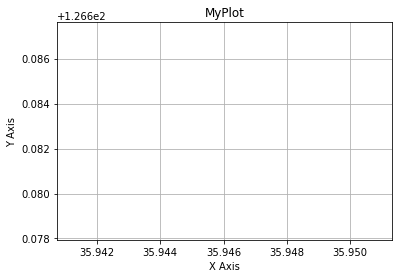

In [63]:
from matplotlib import pyplot as plt

x = df['lon']
y = df['lat']
plt.scatter(x,y)
plt.xlim(35.9407365,35.9513156)
plt.ylim(126.6779419,126.6876086)
plt.title('MyPlot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.scatter(x,y)

plt.grid()
plt.show()